# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você trabalha neste projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de começar a análise dos dados, explique com suas próprias palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

## Inicialização

In [1]:
# Carregando todas as bibliotecas
from scipy import stats as st
import numpy as np
import pandas as pd

## Carregue os dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames

calls = pd.read_csv("datasets/megaline_calls.csv")

internet = pd.read_csv("datasets/megaline_internet.csv")

messages=  pd.read_csv("datasets/megaline_messages.csv")

plans= pd.read_csv("datasets/megaline_plans.csv")

users= pd.read_csv("datasets/megaline_users.csv")

## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

## Planos

In [3]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos
plans.info()
print('duplicados:',plans.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
duplicados: 0


In [4]:
# Imprima uma amostra de dados dos planos
plans.sample(2)

# Imprima informações gerais/resumo sobre o DataFrame dos planos


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

usd_monthly_pay e usd_per_gb estão como int porem ambos se referem a dinheiro, ou seja um tipo mais adequado seria float

## Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [5]:
plans['usd_monthly_pay']=plans['usd_monthly_pay'].astype(float)
plans['usd_per_gb']=plans['usd_per_gb'].astype(float)

## Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [6]:
plans['gb_per_month_included']=plans['mb_per_month_included']/1024.0
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0


## Usuários

In [7]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários

users.info()
print('duplicados:',users.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
duplicados: 0


In [8]:
# Imprima uma amostra de dados dos usuários

users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
78,1078,Earnest,Gray,47,"Seattle-Tacoma-Bellevue, WA MSA",2018-02-11,surf,NaN
431,1431,Napoleon,Burt,74,"Sacramento–Roseville–Folsom, CA MSA",2018-01-28,surf,NaN
343,1343,Teresia,Ewing,43,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-08-23,surf,NaN
269,1269,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15
14,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,NaN
111,1111,Booker,Hahn,75,"Urban Honolulu, HI MSA",2018-09-17,surf,NaN
219,1219,Gavin,Keller,51,"Detroit-Warren-Dearborn, MI MSA",2018-05-14,surf,NaN
135,1135,Scotty,White,51,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-12-23,ultimate,NaN
98,1098,Collin,Sims,33,"Albany-Schenectady-Troy, NY MSA",2018-08-14,surf,NaN
176,1176,Terrance,Shaffer,75,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-03,surf,NaN


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

reg_date e churn_date estão com os tipos object e deveriam estar como data

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date']=pd.to_datetime(users['churn_date'])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [10]:
users['year_month']=users['reg_date'].dt.to_period('M')
users['year_month'].head()

0    2018-12
1    2018-08
2    2018-10
3    2018-01
4    2018-05
Name: year_month, dtype: period[M]

## Chamadas

In [11]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas

calls.info()
print('duplicados:',calls.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
duplicados: 0


In [12]:
# Imprima uma amostra de dados das chamadas

calls.sample(10)

,id,user_id,call_date,duration
12818,1055_225,1055,2018-09-26,7.93
42122,1155_70,1155,2018-08-18,6.77
133323,1483_115,1483,2018-07-02,0.00
57911,1209_385,1209,2018-12-26,0.00
28040,1106_400,1106,2018-05-19,11.07
45829,1166_12,1166,2018-09-27,21.61
20726,1077_693,1077,2018-07-26,0.00
12838,1055_245,1055,2018-07-03,5.07
26862,1101_189,1101,2018-10-15,0.00
70491,1251_502,1251,2018-03-25,0.06


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

call_date esta como objeto porem é uma data

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['call_date'].head()

0   2018-12-27
1   2018-12-27
2   2018-12-27
3   2018-12-28
4   2018-12-30
Name: call_date, dtype: datetime64[ns]

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [14]:
calls['year_month']= calls['call_date'].dt.to_period('M')
calls['year_month'].head()

0    2018-12
1    2018-12
2    2018-12
3    2018-12
4    2018-12
Name: year_month, dtype: period[M]

## Mensagens

# Imprima informações gerais/resumo sobre o DataFrame das mensagens



In [15]:
# Imprima uma amostra dos dados das mensagens
messages.info()
print('duplicados:',messages.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
duplicados: 0


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

O tipo da data esta errado

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [16]:
messages['message_date']=pd.to_datetime(messages['message_date'])
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [17]:
messages['year_month']=messages['message_date'].dt.to_period('M')
messages['year_month'].head()

0    2018-12
1    2018-12
2    2018-12
3    2018-12
4    2018-12
Name: year_month, dtype: period[M]

## Internet

In [18]:
# Imprima informações gerais/resumo sobre o DataFrame da internet
internet.info()
print('duplicados:',internet.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
duplicados: 0


In [19]:
#  Imprima uma amostra de dados para o tráfego da internet

internet.sample(10)

,id,user_id,session_date,mb_used
101534,1485_30,1485,2018-12-30,0.00
89234,1411_135,1411,2018-12-26,611.97
15588,1071_188,1071,2018-07-15,124.24
40768,1182_541,1182,2018-06-18,0.00
61556,1280_52,1280,2018-10-16,641.22
54962,1249_162,1249,2018-09-26,97.99
46383,1206_176,1206,2018-12-01,864.44
12322,1060_31,1060,2018-12-08,469.66
27340,1126_495,1126,2018-08-09,1022.65
84623,1394_165,1394,2018-12-08,825.26


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

Novamente session_date esta como objeto

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [20]:
internet['session_date']=pd.to_datetime(internet['session_date'])
internet['gb_used']=internet['mb_used']/1024.0

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [21]:
internet['year_month'] = internet['session_date'].dt.to_period('M')


## Estude as condições dos planos

[É fundamental entender como os planos funcionam, ou seja, como as cobranças dos usuários são feitas com base na assinatura. Sugerimos imprimir as informações sobre os planos para visualizar novamente as condições.]

In [22]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0


## Agregue os dados por usuário

[Agora, como os dados estão limpos, os agregue por usuário e por período para ter apenas um registro dessas informações. Isso vai facilitar muito as próximas análises.]

In [23]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

calls_by_user=calls.groupby(['user_id','year_month'])['id'].count().reset_index(name='n_call_user_month')
print(calls_by_user)

      user_id year_month  n_call_user_month
0        1000    2018-12                 16
1        1001    2018-08                 27
2        1001    2018-09                 49
3        1001    2018-10                 65
4        1001    2018-11                 64
...       ...        ...                ...
2253     1498    2018-12                 39
2254     1499    2018-09                 41
2255     1499    2018-10                 53
2256     1499    2018-11                 45
2257     1499    2018-12                 65

[2258 rows x 3 columns]


In [24]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

duration_by_user=calls.groupby(['user_id','year_month'])['duration'].sum().reset_index(name='min_call_per_user')
print(duration_by_user)

      user_id year_month  min_call_per_user
0        1000    2018-12             116.83
1        1001    2018-08             171.14
2        1001    2018-09             297.69
3        1001    2018-10             374.11
4        1001    2018-11             404.59
...       ...        ...                ...
2253     1498    2018-12             324.77
2254     1499    2018-09             330.37
2255     1499    2018-10             363.28
2256     1499    2018-11             288.56
2257     1499    2018-12             468.10

[2258 rows x 3 columns]


In [25]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
mess_user_ym=messages.groupby(['user_id','year_month'])['id'].count().reset_index(name='message_user_month')
print(mess_user_ym)

      user_id year_month  message_user_month
0        1000    2018-12                  11
1        1001    2018-08                  30
2        1001    2018-09                  44
3        1001    2018-10                  53
4        1001    2018-11                  36
...       ...        ...                 ...
1801     1496    2018-09                  21
1802     1496    2018-10                  18
1803     1496    2018-11                  13
1804     1496    2018-12                  11
1805     1497    2018-12                  50

[1806 rows x 3 columns]


In [26]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

network_trafic_by_user=internet.groupby(['user_id','year_month'])['gb_used'].sum().reset_index(name='trafic_per_user')
print(network_trafic_by_user)

      user_id year_month  trafic_per_user
0        1000    2018-12         1.856904
1        1001    2018-08         6.756982
2        1001    2018-09        13.002754
3        1001    2018-10        21.807119
4        1001    2018-11        18.070605
...       ...        ...              ...
2272     1498    2018-12        22.595400
2273     1499    2018-09        12.680430
2274     1499    2018-10        19.035576
2275     1499    2018-11        16.419756
2276     1499    2018-12        21.542197

[2277 rows x 3 columns]


[Coloque os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês.]

In [27]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month

merged=pd.merge(calls_by_user, duration_by_user, on=['user_id','year_month'],how='outer')
merged=pd.merge(merged, mess_user_ym, on=['user_id','year_month'],how='outer')
merged=pd.merge(merged, network_trafic_by_user, on=['user_id','year_month'],how='outer')

print(merged)

      user_id year_month  n_call_user_month  min_call_per_user  \
0        1000    2018-12               16.0             116.83   
1        1001    2018-08               27.0             171.14   
2        1001    2018-09               49.0             297.69   
3        1001    2018-10               65.0             374.11   
4        1001    2018-11               64.0             404.59   
...       ...        ...                ...                ...   
2288     1498    2018-12               39.0             324.77   
2289     1499    2018-09               41.0             330.37   
2290     1499    2018-10               53.0             363.28   
2291     1499    2018-11               45.0             288.56   
2292     1499    2018-12               65.0             468.10   

      message_user_month  trafic_per_user  
0                   11.0         1.856904  
1                   30.0         6.756982  
2                   44.0        13.002754  
3                   53.0       

In [28]:
# Adicione as informações sobre o plano

aux = pd.merge(users,plans, left_on='plan', right_on='plan_name')
merged=pd.merge(merged,aux, on='user_id')
print(merged)

      user_id year_month_x  n_call_user_month  min_call_per_user  \
0        1000      2018-12               16.0             116.83   
1        1001      2018-08               27.0             171.14   
2        1001      2018-09               49.0             297.69   
3        1001      2018-10               65.0             374.11   
4        1001      2018-11               64.0             404.59   
...       ...          ...                ...                ...   
2288     1498      2018-12               39.0             324.77   
2289     1499      2018-09               41.0             330.37   
2290     1499      2018-10               53.0             363.28   
2291     1499      2018-11               45.0             288.56   
2292     1499      2018-12               65.0             468.10   

      message_user_month  trafic_per_user first_name   last_name  age  \
0                   11.0         1.856904   Anamaria       Bauer   45   
1                   30.0         6.75

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Joins realizados com o operador adequado.
</div>


[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano; adicione o preço mensal dependendo do plano. Importante: isso talvez não seja tão simples e necessite de várias linhas, considerando as condições do plano. Portanto, não se preocupe se você passar algum tempo nesta etapa.]

In [29]:
# Calcule a receita mensal para cada usuário

def calc_rec(row):
    rec= row['usd_monthly_pay']
    if row['trafic_per_user'] > row['gb_per_month_included']:
        rec+=(row['trafic_per_user']-row['gb_per_month_included'])*row['usd_per_gb']

    if row['message_user_month'] > row['messages_included']:
        rec+=(row['message_user_month']-row['messages_included'])*row['usd_per_message']

    if row['min_call_per_user'] > row['minutes_included']:
        rec+=(row['min_call_per_user']-row['minutes_included'])*row['usd_per_minute']
    return rec


merged['receita']=merged.apply(calc_rec,axis=1)
merged['receita']

0       70.000000
1       20.000000
2       20.000000
3       88.161191
4       50.706055
          ...    
2288    95.954004
2289    20.000000
2290    60.355762
2291    34.197559
2292    85.421973
Name: receita, Length: 2293, dtype: float64

## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados, o que costuma revelar uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para as chamadas. Essas dicas não foram fornecidas para as mensagens e internet, mas o princípio do estudo estatístico é o mesmo em todos os casos.]

### Chamadas

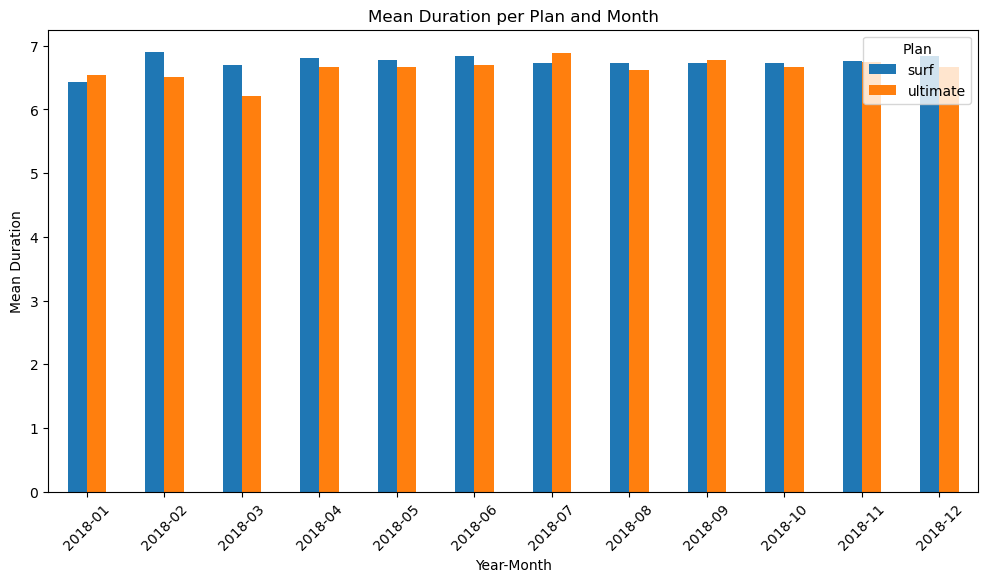

In [30]:
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.
import matplotlib.pyplot as plt

call_plans = pd.merge(calls,users, on='user_id')

call_duration =call_plans.groupby(['plan','year_month_x'])['duration'].mean().reset_index()
pivot_data = call_duration.pivot(index='year_month_x', columns='plan', values='duration')

# Criar gráfico de barras
ax = pivot_data.plot(kind='bar', figsize=(12, 6))

# Adicionar rótulos e título
ax.set_xlabel('Year-Month')
ax.set_ylabel('Mean Duration')
ax.set_title('Mean Duration per Plan and Month')
plt.xticks(rotation=45)  # Rotacionar rótulos do eixo x para melhor leitura
plt.legend(title='Plan')

plt.show()

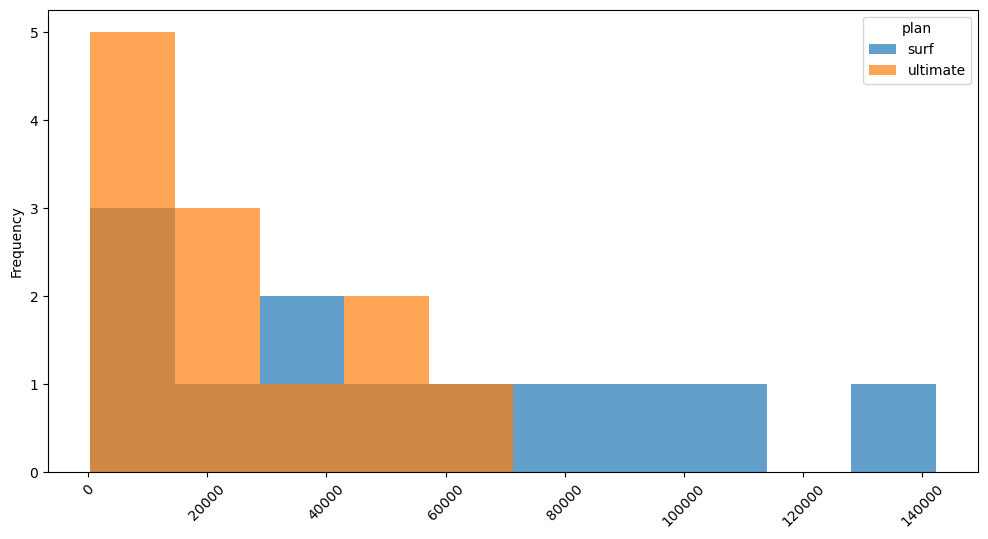

In [31]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.

call_duration_total=call_plans.groupby(['plan','year_month_x'])['duration'].sum().reset_index()

pivot_data=call_duration_total.pivot(index='year_month_x',columns='plan',values='duration')

ax = pivot_data.plot(kind='hist',alpha=0.7, figsize=(12, 6))

plt.xticks(rotation=45)
plt.show()

[Calcule a média e a variância da duração das chamadas para refletir se os usuários de cada plano possuem comportamentos diferentes sobre as chamadas.]

In [32]:
# Calcule a média e a variância da duração mensal das chamadas


mean_month=merged.groupby(['plan','year_month_x'])['min_call_per_user'].agg({'mean','var'}).reset_index()
print(mean_month)



        plan year_month_x           var        mean
0       surf      2018-01  14795.440200  192.840000
1       surf      2018-02  46959.219961  280.851111
2       surf      2018-03  31821.317991  310.970000
3       surf      2018-04  45615.666796  332.380000
4       surf      2018-05  50778.127459  387.108000
5       surf      2018-06  39424.054023  411.450625
6       surf      2018-07  53364.540232  428.060917
7       surf      2018-08  46639.240873  394.474717
8       surf      2018-09  39785.302974  397.133298
9       surf      2018-10  44103.681803  414.435733
10      surf      2018-11  43560.874928  408.255415
11      surf      2018-12  53646.781898  457.547074
12  ultimate      2018-01  14991.369958  183.162500
13  ultimate      2018-02  48579.581537  443.171667
14  ultimate      2018-03  54273.917252  285.701667
15  ultimate      2018-04  31057.727496  316.508095
16  ultimate      2018-05  39290.610940  383.664828
17  ultimate      2018-06  33837.770156  365.358222
18  ultimate

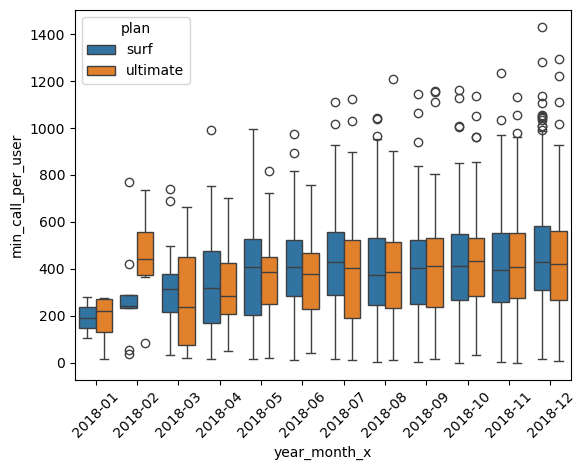

In [33]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
import seaborn as sns

sns.boxplot(data=merged.sort_values('year_month_x'),y='min_call_per_user',x='year_month_x',hue='plan')
plt.xticks(rotation=45)
plt.show()

[Formule conclusões sobre como os usuários se comportam em termos de chamadas. O comportamento é diferente dependendo do plano?]

A media de duração das chamadas se manteve proxima ao longo de todos os meses do ano de 2018

### Mensagens

C:\Users\User\AppData\Local\Temp\ipykernel_14232\3662690545.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged.sort_values('year_month_x'),y='message_user_month',x='year_month_x',hue='plan',ci=None)


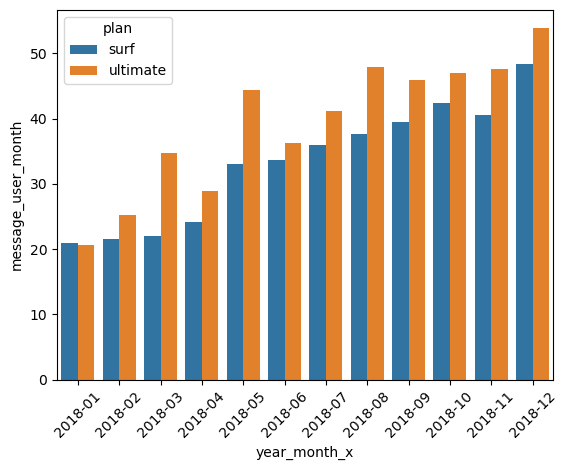

In [34]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês

sns.barplot(data=merged.sort_values('year_month_x'),y='message_user_month',x='year_month_x',hue='plan',ci=None)
plt.xticks(rotation=45)
plt.show()

[Formule conclusões sobre como os usuários costumam consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]

apesar da menor quantidade de planos ultimate eles tem um maior numero de mensagens enviadas ao longo dos meses

### Internet

C:\Users\User\AppData\Local\Temp\ipykernel_14232\2000720298.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged.sort_values('year_month_x'),y='trafic_per_user',x='year_month_x',hue='plan',ci=None)


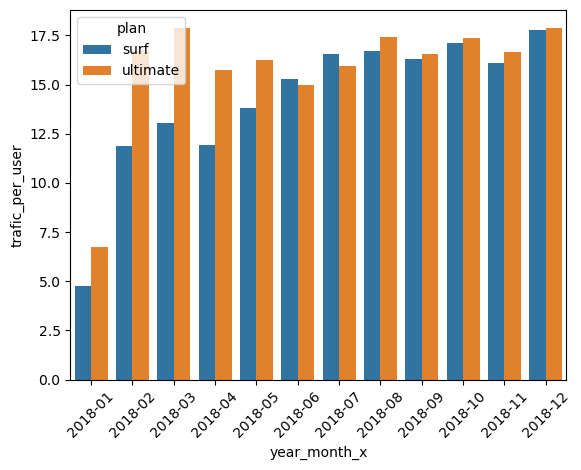

In [35]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

sns.barplot(data=merged.sort_values('year_month_x'),y='trafic_per_user',x='year_month_x',hue='plan',ci=None)
plt.xticks(rotation=45)
plt.show()


[Formule conclusões sobre como os usuários tendem a consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]

O consumo do plano ultimate se mostrou muito maior do que do plano surf de 2018-01 até 2018-05, a partir de 2018-06 eles se tornaram mais proximos

## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

C:\Users\User\AppData\Local\Temp\ipykernel_14232\1650452945.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged.sort_values('year_month_x'),y='receita',x='year_month_x',hue='plan',ci=None)


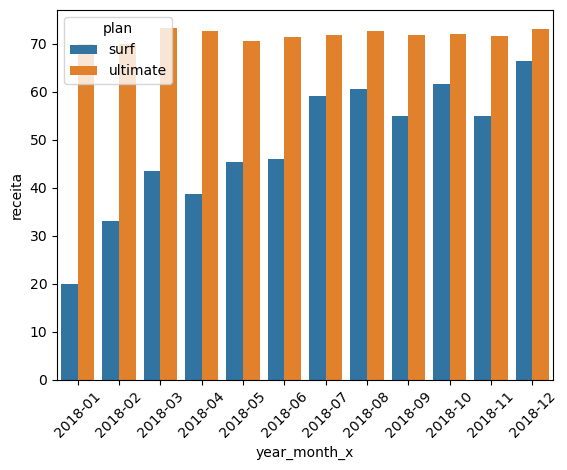

In [36]:
sns.barplot(data=merged.sort_values('year_month_x'),y='receita',x='year_month_x',hue='plan',ci=None)
plt.xticks(rotation=45)
plt.show()

a receita gerada pelo plano ultimate foi consideravel mente maior do que a do plano surf 

[Formule conclusões sobre como a receita difere entre os planos.]

## Teste hipóteses estatísticas

[Teste a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [37]:
# Teste as hipóteses
s1=merged[merged['plan']=='surf']['receita']
s2=merged[merged['plan']=='ultimate']['receita']

print(s1.var(),s2.var())
    
alpha=0.5

res = st.ttest_ind(s1,s2,equal_var=False)

#hipotese nula a receita media dos planos surf e ultimate são diferentes
#hipotese alternativa a receita é igual

print()
print(res.pvalue)
print()
if res.pvalue<alpha:
    print('regeitamos a hipotese nula')
else:
    print('nao podemos rejeitar a hipotese nula')

2887.544971039368 115.9680805821281

4.881852673479799e-25

regeitamos a hipotese nula


[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [38]:
# Teste as hipóteses

s1=merged[merged['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['receita']
s2=merged[merged['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']['receita']


print(s1.var(),s2.var())

alpha=0.5

res = st.ttest_ind(s1,s2,equal_var=False)

# Hipotese nula: a receita media dos usuarios de NY-NJ é diferente das outras regiões
# Hipotese alternativa: a receita media dos usuarios de NY-NJ não é diferente das outras regiões

print()
print(res.pvalue)
print()
if res.pvalue<alpha:
    print('rejeitamos a hipotese nula')
else:
    print('nao podemos rejeitar a hipotese nula')

1777.752923296623 2116.1719888966886

0.01860947297497194

rejeitamos a hipotese nula


## Conclusão geral

[Liste suas conclusões importantes nesta seção final, certifique-se de que elas cobrem todas as decisões (suposições) importantes que você tomou e que levaram à maneira como você processou e analisou os dados.]

Ambos os planos acabam por coonsumir uma quantidade de dados similar e também por gerar uma receita semelhante, a quantidade de usuarios do plano surf faz com que ele fique com valores bem proximos de consumo e receita gerada do plano ultimate